# R companion of 3_mg_fig2_common_pathways

# fig2A. (or supplements gene analysis)


In [1]:
library(pheatmap)  
library(tidyverse)
library(RColorBrewer)
library(viridis)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.4
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: viridisLite



In [2]:
save_pheatmap_png <- function(x, filename, width=1200, height=1000, res = 200) {
  png(filename, width = width, height = height, res = res)
  grid::grid.newpage()
  grid::grid.draw(x$gtable)
  dev.off()
}


# fig 2A
RNA plot

In [27]:
rna_df_essential = read.csv('../data/processed/fig2/rna_df_essential.csv',row.names=1)
rna_df_essential = log10(rna_df_essential+1e-3)
dim(rna_df_essential)

rna_df_essential_sel = read.csv('../data/processed/fig2/rna_df_essential_sel.csv',row.names=1)
rna_df_essential_sel= log10(rna_df_essential_sel+1e-3)
dim(rna_df_essential_sel)

[1] 1739   39

[1] 1739   17

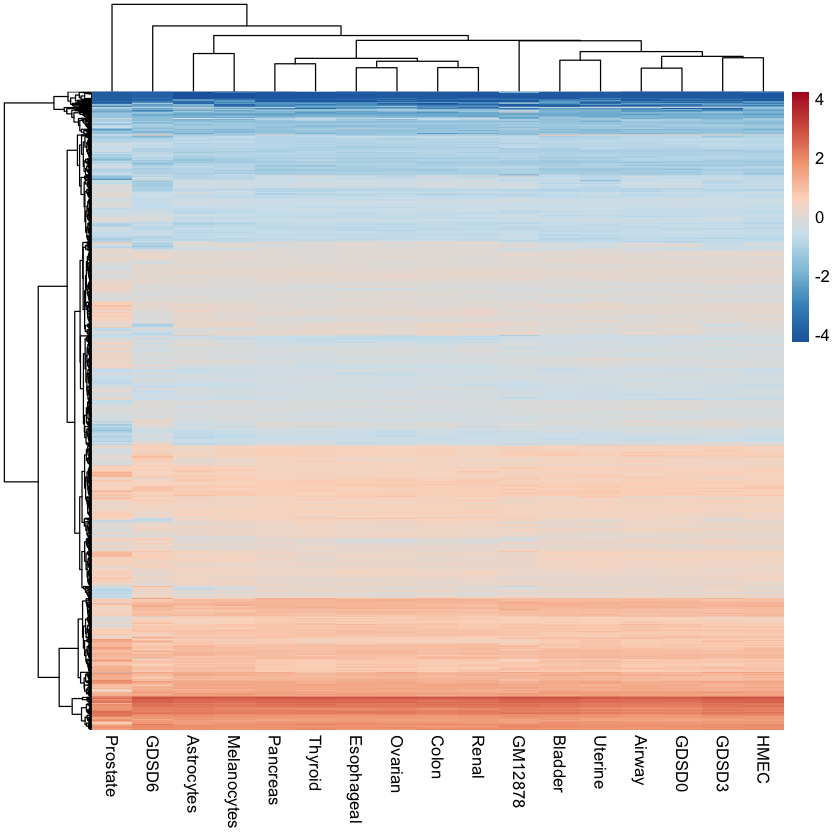

In [31]:
p1 = pheatmap(rna_df_essential_sel,
              scale='column',
              show_rownames=F,
        color = colorRampPalette(rev(brewer.pal(n =8, name ="RdBu")))(255))
# save_pheatmap_png(p1, 'networks/representations_cell_type_specific/tissue_pairwisedist_tpm1gene_crm_pca_sum.png')

In [28]:
rna_df_essential_sel_long = gather(rna_df_essential_sel,"tissue","log_TPM")
rna_df_essential_long = gather(rna_df_essential,"tissue", "log_TPM")

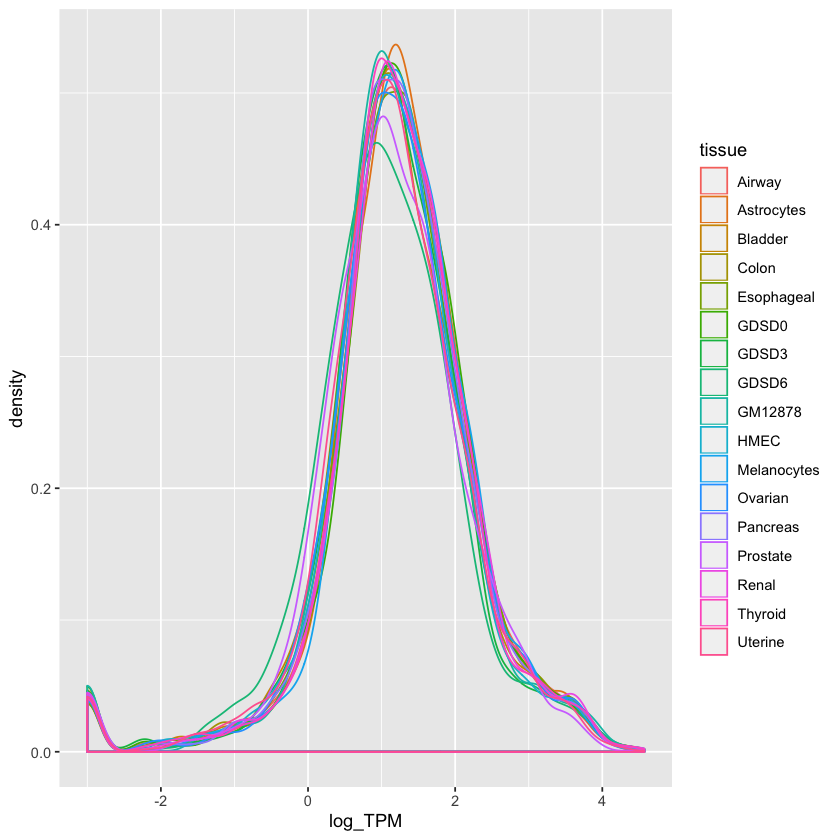

In [22]:
p = ggplot(rna_df_essential_sel_long, aes(x=log_TPM,color=tissue))+geom_density()
ggsave()

In [29]:
rna_df_essential_long%>%
    group_by(tissue)%>%
    filter(log_TPM>1)%>%
    summarize(num_expressed=n())%>%
    mutate(num_essential=dim(rna_df_essential_sel)[1])%>%
    mutate(perc_expressed = num_expressed/num_essential)

tissue,num_expressed,num_essential,perc_expressed
<chr>,<int>,<int>,<dbl>
A431.CTRLi,1028,1739,0.5911443
A431.p63i,1098,1739,0.6313974
Airway,1096,1739,0.6302473
Astrocytes,1120,1739,0.6440483
Bladder,1026,1739,0.5899942
CAL27.CTRLi,1195,1739,0.6871765
CAL27.p63i,1093,1739,0.6285221
COLO_SCR_DMSO,1109,1739,0.6377228
COLO_SCR_PLX,1011,1739,0.5813686


In [26]:
rna_df_essential_sel_long%>%
    group_by(tissue)%>%
    filter(log_TPM>1)%>%
    summarize(num_expressed=n())%>%
    mutate(num_essential=dim(rna_df_essential_sel)[1])%>%
    mutate(perc_expressed = num_expressed/num_essential)

tissue,num_expressed,num_essential,perc_expressed
<chr>,<int>,<int>,<dbl>
Airway,1096,1739,0.6302473
Astrocytes,1120,1739,0.6440483
Bladder,1026,1739,0.5899942
Colon,1102,1739,0.6336975
Esophageal,1084,1739,0.6233468
GDSD0,1116,1739,0.6417481
GDSD3,1028,1739,0.5911443
GDSD6,906,1739,0.5209891
GM12878,1023,1739,0.5882691
